In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv('Advertising.csv')

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
df.shape

(200, 4)

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
X = df.drop('sales', axis=1)
y = df['sales']

In [13]:
X.shape

(200, 3)

In [14]:
y.shape

(200,)

In [16]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [17]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [18]:
poly_features = polynomial_converter.fit_transform(X)

In [19]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [20]:
poly_features.shape 
#Here the shape is 200, 9
#becasue of the new features of the polynomial

(200, 9)

In [22]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                       "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [23]:
X.shape #Here the X shape is 200, 3 comapred to the new one we have did before

(200, 3)

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(160, 9)

In [29]:
X_test.shape

(40, 9)

In [30]:
y_train.shape

(160,)

In [31]:
y_test.shape

(40,)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred

array([17.25443578, 22.7193321 , 20.42799436,  7.542709  , 24.37103037,
       12.55927164, 22.80784986,  8.34371358, 12.0586023 , 15.69024565,
        7.89166367,  8.27082715, 11.86055971,  6.16591094, 10.57664393,
       12.3628954 ,  6.74390963, 16.65082111, 10.68661722, 19.03888161,
       20.15223945, 13.1137814 ,  9.56273868, 22.10675225,  8.96725241,
        7.7794437 , 22.40745151, 12.72065973, 10.25529986,  6.22368636,
       11.64677688, 10.22431946, 23.39763949,  9.17403232, 15.36143449,
       21.05675814, 10.9795286 , 20.23370753, 11.85153256,  6.58779915])

In [39]:
my_dict = {'Actual': y_test, 'pred': y_pred, 'residuals': y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head()

,Actual,pred,residuals
95,16.9,17.254436,-0.354436
15,22.4,22.719332,-0.319332
30,21.4,20.427994,0.972006
158,7.3,7.542709,-0.242709
128,24.7,24.371030,0.328970


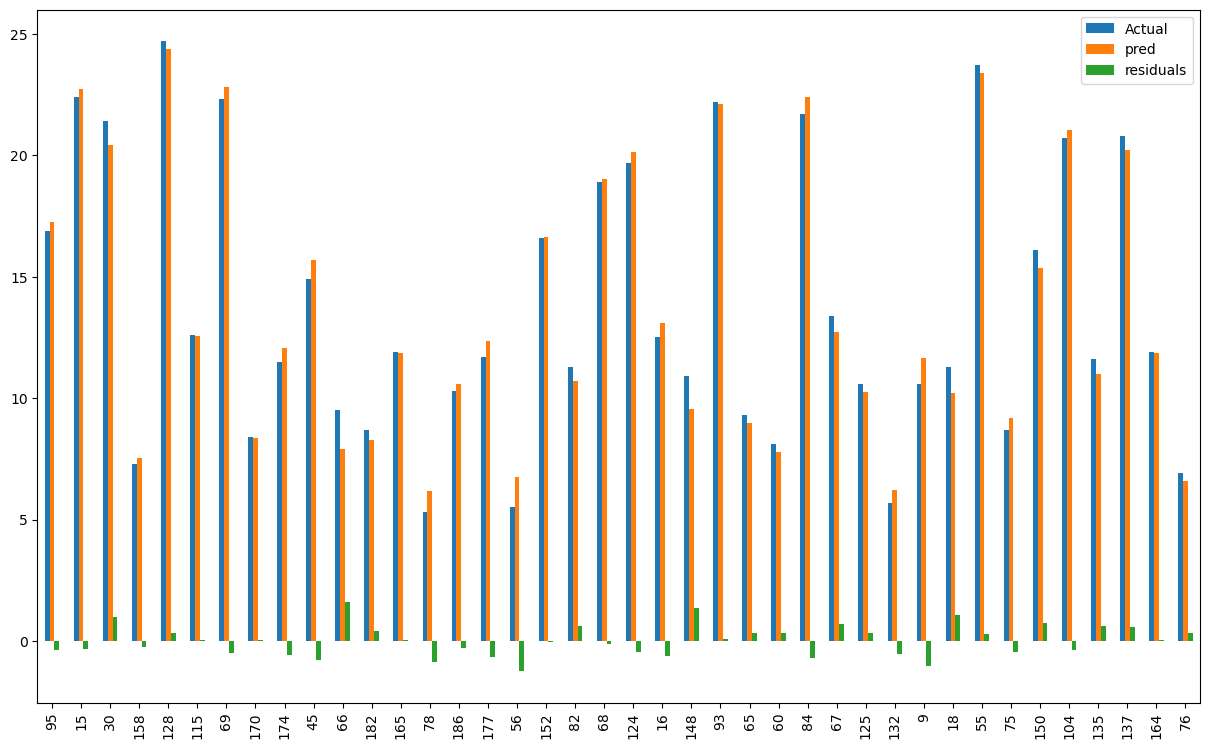

In [40]:
compare.plot(kind='bar', figsize=(15,9))
plt.show()

In [41]:
model.coef_

array([ 5.32356160e-02,  1.70980451e-02,  1.05807447e-02, -1.12286779e-04,
        1.11121741e-03, -7.37989541e-05,  1.32842962e-04,  1.24892479e-04,
        2.79665560e-05])

In [44]:
df_coef = pd.DataFrame(model.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ['coef'])

In [45]:
df_coef

,coef
TV,0.053236
radio,0.017098
newspaper,0.010581
TV^2,-0.000112
TV&Radio,0.001111
TV&Newspaper,-0.000074
Radio^2,0.000133
Radio&newspaper,0.000125
Newspaper^2,0.000028


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
y_pred = model.predict(X_test)

In [59]:
y_pred

array([17.25443578, 22.7193321 , 20.42799436,  7.542709  , 24.37103037,
       12.55927164, 22.80784986,  8.34371358, 12.0586023 , 15.69024565,
        7.89166367,  8.27082715, 11.86055971,  6.16591094, 10.57664393,
       12.3628954 ,  6.74390963, 16.65082111, 10.68661722, 19.03888161,
       20.15223945, 13.1137814 ,  9.56273868, 22.10675225,  8.96725241,
        7.7794437 , 22.40745151, 12.72065973, 10.25529986,  6.22368636,
       11.64677688, 10.22431946, 23.39763949,  9.17403232, 15.36143449,
       21.05675814, 10.9795286 , 20.23370753, 11.85153256,  6.58779915])

In [60]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

    
    
    return None

In [61]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.9869181490609605
MAE      : 0.5261794444043729
MSE      : 0.4129102285378985
RMSE     : 0.6425809120553602


In [62]:
y_train_pred = model.predict(X_train)

In [63]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score : 0.986104518792419
MAE      : 0.4089721951355143
MSE      : 0.36039667447012214
RMSE     : 0.6003304710491731
